In [32]:
#wczytanie danych
import pandas as pd

file_name = 'annual-change-in-average-male-height.csv'
data = pd.read_csv(file_name)

data.head()


,Entity,Code,Year,Mean male height (cm),Mean female height (cm),Year-on-year change in female height (%),Year-on-year change in male height (%),Population (historical estimates),Daily caloric intake per person that comes from animal protein
0,Afghanistan,AFG,1896.0,161.164095,149.187747,0.08962,0.01997,NaN,NaN
1,Afghanistan,AFG,1897.0,161.196286,149.321451,0.08977,0.01986,10694804.0,55.128870
2,Afghanistan,AFG,1898.0,161.228297,149.455494,0.08966,0.02011,10745168.0,54.959705
3,Afghanistan,AFG,1899.0,161.260727,149.589503,0.08963,0.02005,12057436.0,57.932200
4,Afghanistan,AFG,1900.0,161.293068,149.723587,0.08949,0.02010,14003764.0,58.493233


In [33]:
#zapoznanie się z danymi
data.Entity.nunique()
data.Year


0        1896.0
1        1897.0
2        1898.0
3        1899.0
4        1900.0
          ...  
59618       NaN
59619       NaN
59620       NaN
59621       NaN
59622       NaN
Name: Year, Length: 59623, dtype: float64

In [34]:
#czyszczenie danych

# 1. Usuń duplikaty
data = data.drop_duplicates()

# 2. Usuń brakujące wartości
data = data.dropna()

# 3. Normalizacja danych (np. zmiana typu danych dla roku)
data['Year'] = data['Year'].astype(int)
data['Population (historical estimates)'] = data['Population (historical estimates)'].astype(int)

# Wyświetl pierwsze kilka wierszy danych po wyczyszczeniu
data.head()


,Entity,Code,Year,Mean male height (cm),Mean female height (cm),Year-on-year change in female height (%),Year-on-year change in male height (%),Population (historical estimates),Daily caloric intake per person that comes from animal protein
1,Afghanistan,AFG,1897,161.196286,149.321451,0.08977,0.01986,10694804,55.128870
2,Afghanistan,AFG,1898,161.228297,149.455494,0.08966,0.02011,10745168,54.959705
3,Afghanistan,AFG,1899,161.260727,149.589503,0.08963,0.02005,12057436,57.932200
4,Afghanistan,AFG,1900,161.293068,149.723587,0.08949,0.02010,14003764,58.493233
5,Afghanistan,AFG,1901,161.325492,149.857573,0.08899,0.02037,15455560,61.008570


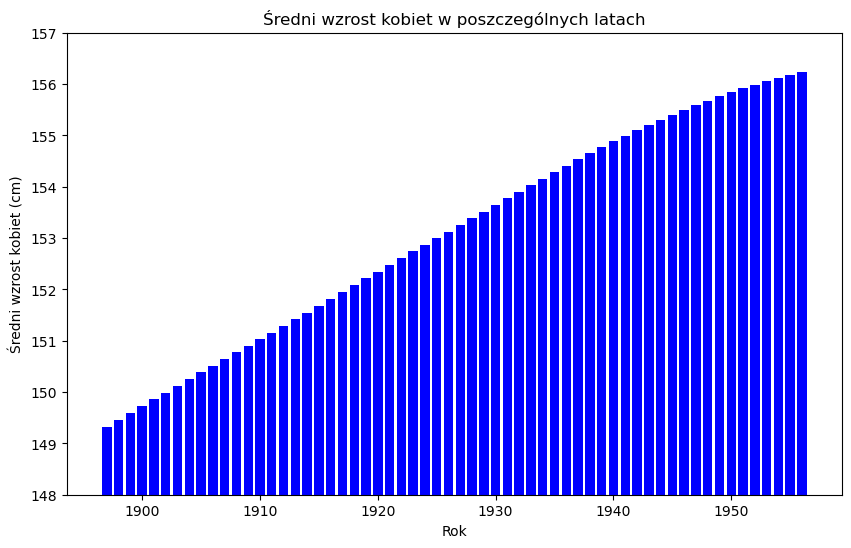

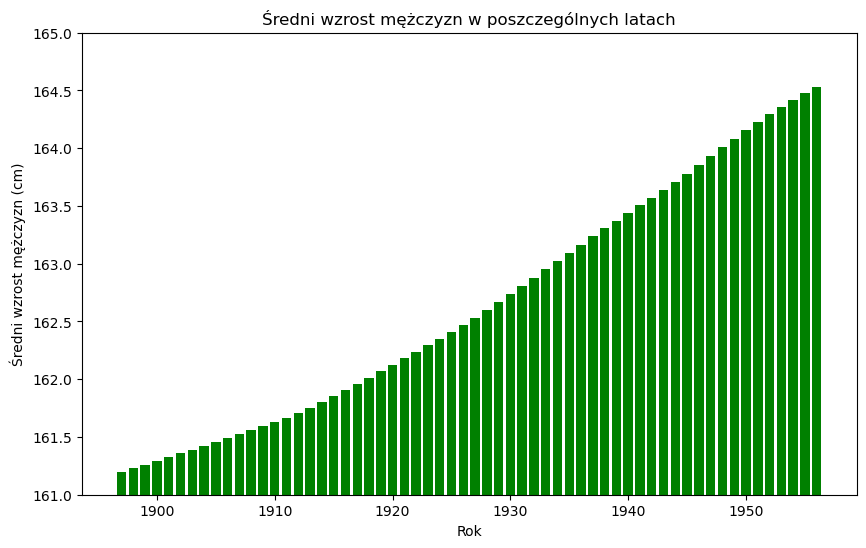

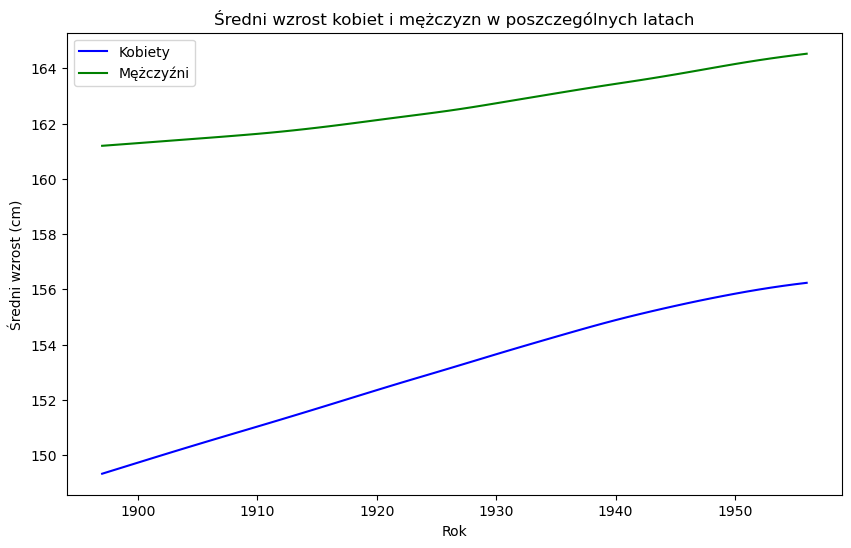

In [35]:
#analiza danych dla Afganistanu

# 1. średni wzrost kobiet w poszczególnych latach
import matplotlib.pyplot as plt


data_afg = data[data['Code'] == 'AFG']

kolumna1 = 'Year'
kolumna2 = 'Mean female height (cm)'


plt.figure(figsize=(10, 6))
plt.bar(data_afg[kolumna1], data_afg[kolumna2], color='blue')
plt.title('Średni wzrost kobiet w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Średni wzrost kobiet (cm)')
plt.ylim(148, 157)
plt.show()



# 2. średni wzrost mężczyzn w poszczególnych latach
import matplotlib.pyplot as plt


data_afg = data[data['Code'] == 'AFG']

kolumna1 = 'Year'
kolumna2 = 'Mean male height (cm)'

plt.figure(figsize=(10, 6))
plt.bar(data_afg[kolumna1], data_afg[kolumna2], color='green')
plt.title('Średni wzrost mężczyzn w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Średni wzrost mężczyzn (cm)')
plt.ylim(161, 165)
plt.show()

# 3. porównanie wykresów liniowych wzorstu kobiet i mężczyzn

data_afg = data[data['Code'] == 'AFG']

plt.figure(figsize=(10, 6))
plt.plot(data_afg['Year'], data_afg['Mean female height (cm)'], label='Kobiety', color='blue')
plt.plot(data_afg['Year'], data_afg['Mean male height (cm)'], label='Mężczyźni', color='green')

plt.title('Średni wzrost kobiet i mężczyzn w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Średni wzrost (cm)')

plt.legend()

plt.show()


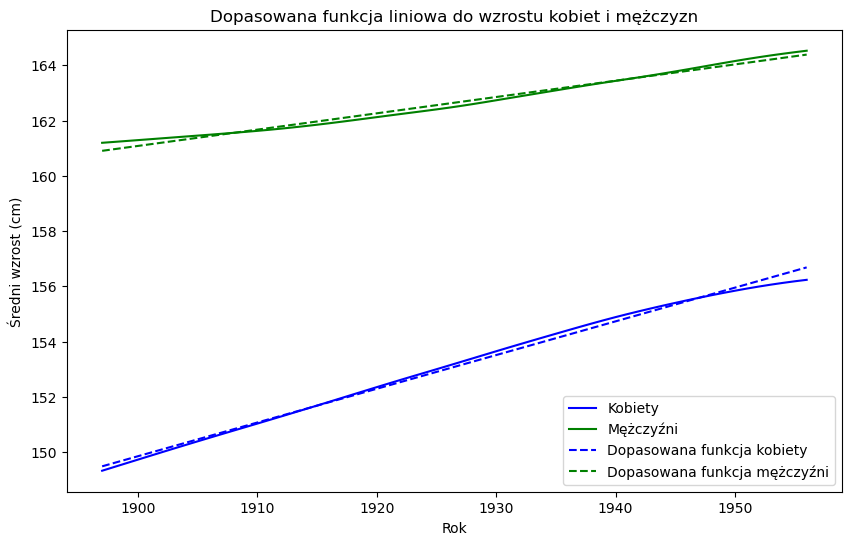

Funkcja dopasowana dla kobiet: y = 0.12 * x + -82.16
Funkcja dopasowana dla mężczyzn: y = 0.06 * x + 48.88


In [36]:
#dopasowanie fukcji liniowej
from sklearn.linear_model import LinearRegression

data_afg = data[data['Code'] == 'AFG']

kolumna1 = 'Year'
kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'

X_kobiety = data_afg[[kolumna1]]
y_kobiety = data_afg[kolumna2_kobiety]
reg_kobiety = LinearRegression().fit(X_kobiety, y_kobiety)
slope_kobiety = reg_kobiety.coef_[0]
intercept_kobiety = reg_kobiety.intercept_

X_mezczyzni = data_afg[[kolumna1]]
y_mezczyzni = data_afg[kolumna2_mezczyzni]
reg_mezczyzni = LinearRegression().fit(X_mezczyzni, y_mezczyzni)
slope_mezczyzni = reg_mezczyzni.coef_[0]
intercept_mezczyzni = reg_mezczyzni.intercept_

plt.figure(figsize=(10, 6))
plt.plot(data_afg['Year'], data_afg['Mean female height (cm)'], label='Kobiety', color='blue')
plt.plot(data_afg['Year'], data_afg['Mean male height (cm)'], label='Mężczyźni', color='green')

plt.plot(data_afg['Year'], slope_kobiety * data_afg['Year'] + intercept_kobiety, '--', label='Dopasowana funkcja kobiety', color='blue')
plt.plot(data_afg['Year'], slope_mezczyzni * data_afg['Year'] + intercept_mezczyzni, '--', label='Dopasowana funkcja mężczyźni', color='green')

plt.title('Dopasowana funkcja liniowa do wzrostu kobiet i mężczyzn')
plt.xlabel('Rok')
plt.ylabel('Średni wzrost (cm)')
plt.legend()

plt.show()

print(f'Funkcja dopasowana dla kobiet: y = {slope_kobiety:.2f} * x + {intercept_kobiety:.2f}')
print(f'Funkcja dopasowana dla mężczyzn: y = {slope_mezczyzni:.2f} * x + {intercept_mezczyzni:.2f}')


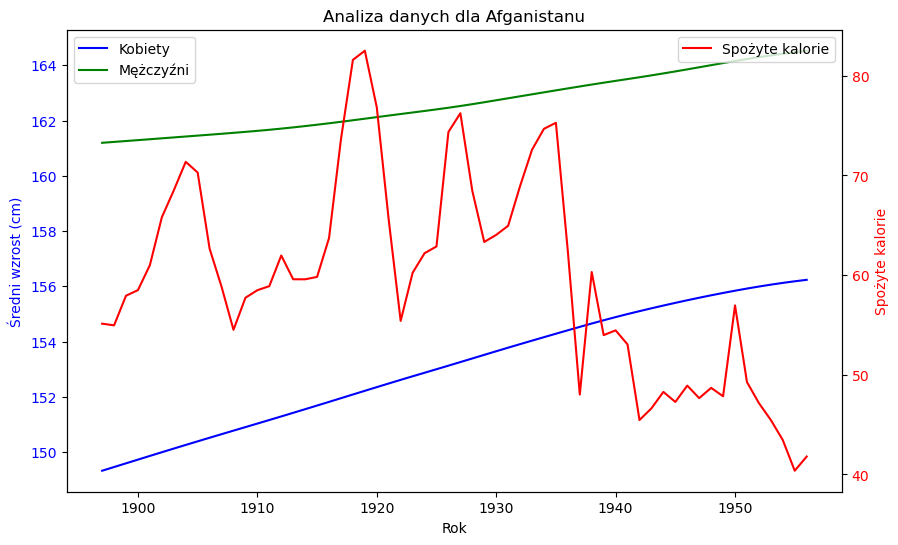

In [37]:
#wykresy wzrostu kobiet, mężczyzn i spożywanych kalorii w poszczególnych latach dla AFG
import matplotlib.pyplot as plt

data_afg = data[data['Code'] == 'AFG']

kolumna1 = 'Year'
kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3 = 'Daily caloric intake per person that comes from animal protein'

fig, ax1 = plt.subplots(figsize=(10, 6))

color_kobiety = 'blue'
color_mezczyzni = 'green'
ax1.plot(data_afg['Year'], data_afg[kolumna2_kobiety], label='Kobiety', color=color_kobiety)
ax1.plot(data_afg['Year'], data_afg[kolumna2_mezczyzni], label='Mężczyźni', color=color_mezczyzni)
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średni wzrost (cm)', color=color_kobiety)
ax1.tick_params(axis='y', labelcolor=color_kobiety)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color_protein = 'red'
ax2.plot(data_afg['Year'], data_afg[kolumna3], label='Spożyte kalorie', color=color_protein)
ax2.set_ylabel('Spożyte kalorie', color=color_protein)
ax2.tick_params(axis='y', labelcolor=color_protein)
ax2.legend(loc='upper right')

plt.title('Analiza danych dla Afganistanu')

plt.show()


In [38]:
#Korelacja między spożytymi kaloriami a średnim wzrostem kobiet i mężczyzn w AFG
import numpy as np

data_afg = data[data['Code'] == 'AFG']

kolumna1 = 'Year'
kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3 = 'Daily caloric intake per person that comes from animal protein'

correlation_kobiety = np.corrcoef(data_afg[kolumna3], data_afg[kolumna2_kobiety])[0, 1]

correlation_mezczyzni = np.corrcoef(data_afg[kolumna3], data_afg[kolumna2_mezczyzni])[0, 1]

print(f'Korelacja między spożytymi kaloriami a średnim wzrostem kobiet: {correlation_kobiety:.2f}')
print(f'Korelacja między spożytymi kaloriami a średnim wzrostem mężczyzn: {correlation_mezczyzni:.2f}')


Korelacja między spożytymi kaloriami a średnim wzrostem kobiet: -0.48
Korelacja między spożytymi kaloriami a średnim wzrostem mężczyzn: -0.57


In [39]:
#testowanie wybranych hipotez dla AFG

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, ttest_ind

data_afg = data[data['Code'] == 'AFG']

kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3 = 'Daily caloric intake per person that comes from animal protein'

# H1: Im więcej spożytych kalorii tym wyższy wzrost u kobiet i u mężczyzn
correlation_kobiety, p_value_kobiety = pearsonr(data[kolumna3], data[kolumna2_kobiety])
correlation_mezczyzni, p_value_mezczyzni = pearsonr(data[kolumna3], data[kolumna2_mezczyzni])

print(f'Korelacja między spożytymi kaloriami a wzrostem kobiet: {correlation_kobiety:.2f}, p-value: {p_value_kobiety:.4f}')
print(f'Korelacja między spożytymi kaloriami a wzrostem mężczyzn: {correlation_mezczyzni:.2f}, p-value: {p_value_mezczyzni:.4f}')

# H2: Mężczyźni są wyżsi od kobiet (Test t-studenta)
t_statistic, p_value_ttest = ttest_ind(data[kolumna2_mezczyzni], data[kolumna2_kobiety], equal_var=False)

print(f'Test t-studenta: t-statistic: {t_statistic:.2f}, p-value: {p_value_ttest:.4f}')

if p_value_kobiety < 0.05:
    print('Hipoteza 1: Odrzucamy hipotezę zerową, istnieje statystycznie istotna korelacja między spożytymi kaloriami a wzrostem kobiet.')
else:
    print('Hipoteza 1: Nie ma statystycznie istotnej korelacji między spożytymi kaloriami a wzrostem kobiet.')

if p_value_mezczyzni < 0.05:
    print('Hipoteza 1: Odrzucamy hipotezę zerową, istnieje statystycznie istotna korelacja między spożytymi kaloriami a wzrostem mężczyzn.')
else:
    print('Hipoteza 1: Nie ma statystycznie istotnej korelacji między spożytymi kaloriami a wzrostem mężczyzn.')

if p_value_ttest < 0.05:
    print('Hipoteza 2: Odrzucamy hipotezę zerową, mężczyźni są statystycznie istotnie wyżsi od kobiet.')
else:
    print('Hipoteza 2: Nie ma statystycznie istotnej różnicy w średnim wzroście między mężczyznami a kobietami.')


Korelacja między spożytymi kaloriami a wzrostem kobiet: -0.01, p-value: 0.4710
Korelacja między spożytymi kaloriami a wzrostem mężczyzn: 0.01, p-value: 0.3162
Test t-studenta: t-statistic: 147.94, p-value: 0.0000
Hipoteza 1: Nie ma statystycznie istotnej korelacji między spożytymi kaloriami a wzrostem kobiet.
Hipoteza 1: Nie ma statystycznie istotnej korelacji między spożytymi kaloriami a wzrostem mężczyzn.
Hipoteza 2: Odrzucamy hipotezę zerową, mężczyźni są statystycznie istotnie wyżsi od kobiet.


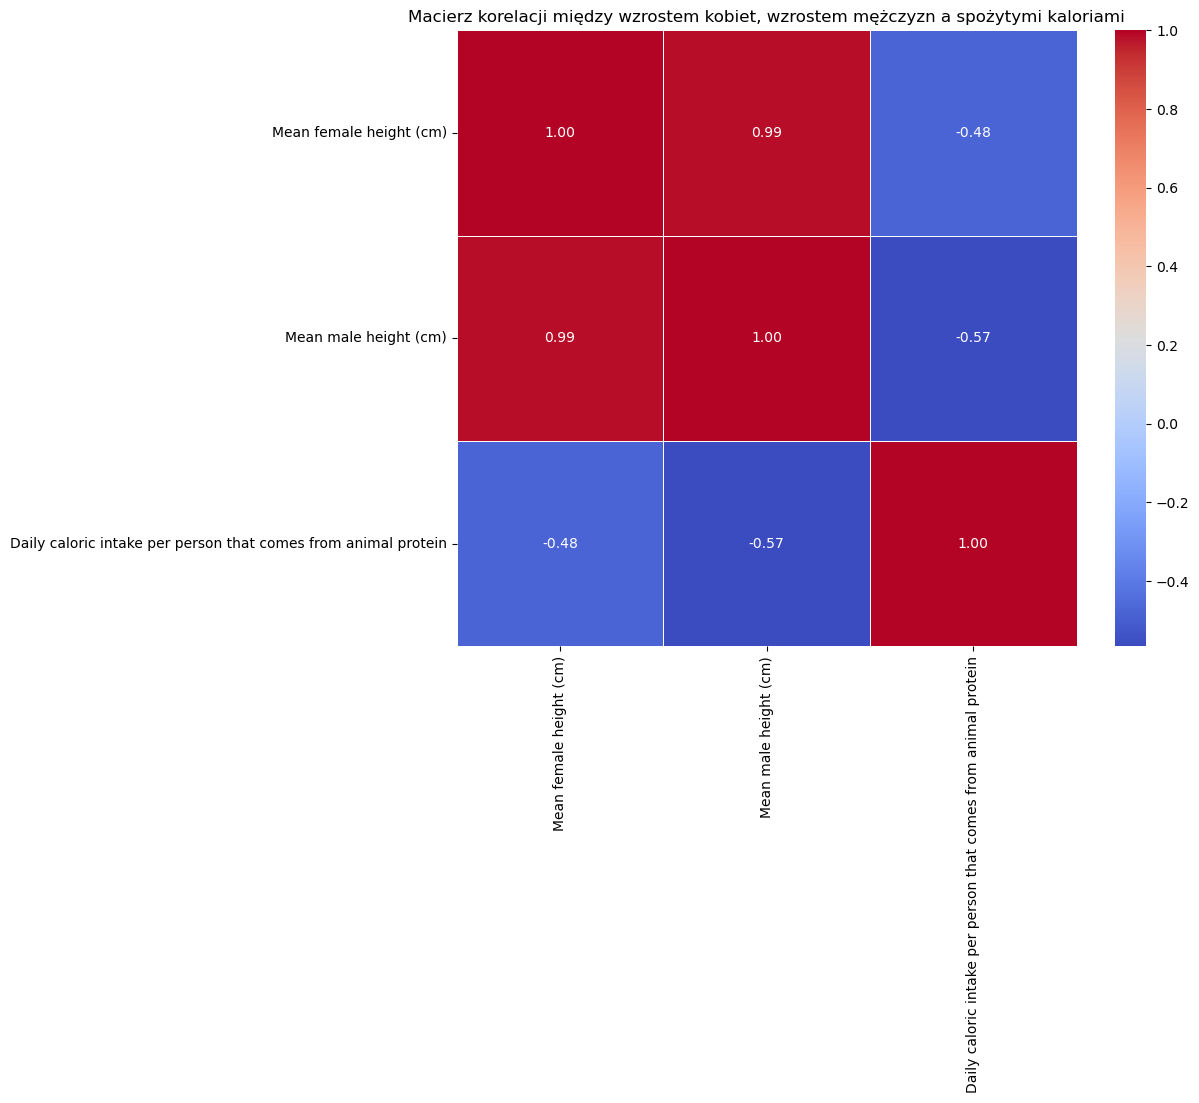

Wzrost kobiet a spożycie kalorii są niezależne (korelacja=-0.48).
Wzrost mężczyzn a spożycie kalorii są zależne (korelacja=-0.57).


In [40]:
#Macierze korelacjj dla AFG - dane zależne/niezależne

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_afg = data[data['Code'] == 'AFG']

kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3 = 'Daily caloric intake per person that comes from animal protein'

correlation_matrix = data_afg[[kolumna2_kobiety, kolumna2_mezczyzni, kolumna3]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji między wzrostem kobiet, wzrostem mężczyzn a spożytymi kaloriami')
plt.show()

threshold = 0.5  # Próg dla uznania korelacji za znaczną

if abs(correlation_matrix[kolumna2_kobiety][kolumna3]) > threshold:
    print(f'Wzrost kobiet a spożycie kalorii są zależne (korelacja={correlation_matrix[kolumna2_kobiety][kolumna3]:.2f}).')
else:
    print(f'Wzrost kobiet a spożycie kalorii są niezależne (korelacja={correlation_matrix[kolumna2_kobiety][kolumna3]:.2f}).')

if abs(correlation_matrix[kolumna2_mezczyzni][kolumna3]) > threshold:
    print(f'Wzrost mężczyzn a spożycie kalorii są zależne (korelacja={correlation_matrix[kolumna2_mezczyzni][kolumna3]:.2f}).')
else:
    print(f'Wzrost mężczyzn a spożycie kalorii są niezależne (korelacja={correlation_matrix[kolumna2_mezczyzni][kolumna3]:.2f}).')


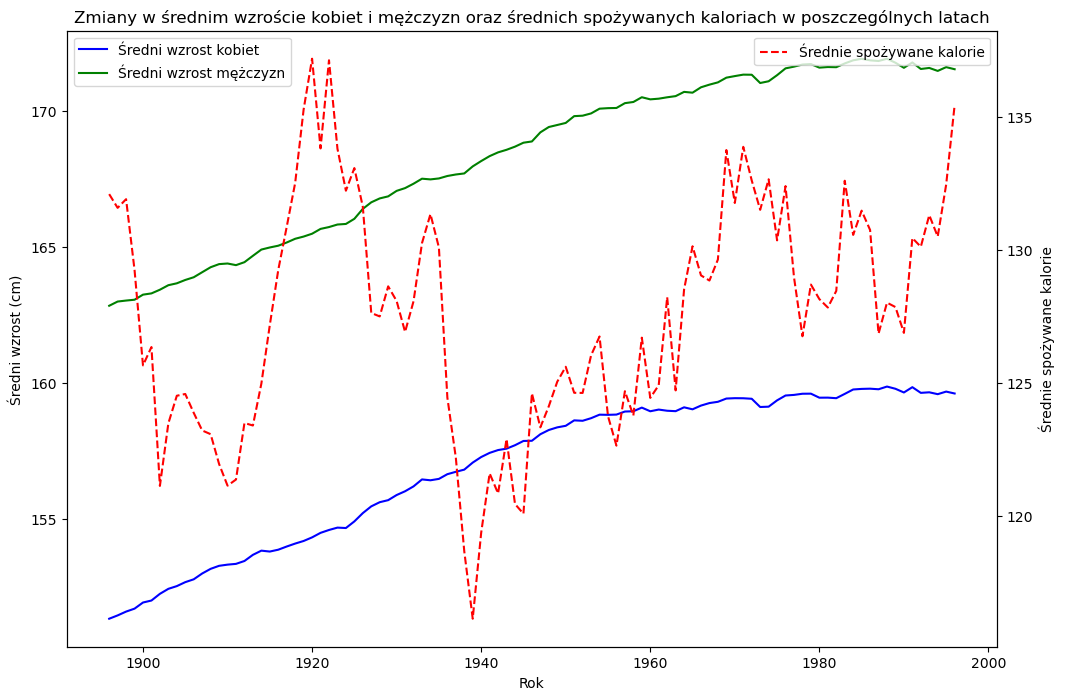

In [41]:
#Analiza dla wszystkich krajów - średnni wzrost mężczyzn i kobiet i spożycie kalorii w poszczególnych latach

import pandas as pd
import matplotlib.pyplot as plt

average_heights = data.groupby('Year')[['Mean female height (cm)', 'Mean male height (cm)']].mean().reset_index()

average_calories = data.groupby('Year')['Daily caloric intake per person that comes from animal protein'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(average_heights['Year'], average_heights['Mean female height (cm)'], label='Średni wzrost kobiet', color='blue')
ax1.plot(average_heights['Year'], average_heights['Mean male height (cm)'], label='Średni wzrost mężczyzn', color='green')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średni wzrost (cm)')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(average_calories['Year'], average_calories['Daily caloric intake per person that comes from animal protein'], label='Średnie spożywane kalorie', color='red', linestyle='--')
ax2.set_ylabel('Średnie spożywane kalorie')
ax2.legend(loc='upper right')

plt.title('Zmiany w średnim wzroście kobiet i mężczyzn oraz średnich spożywanych kaloriach w poszczególnych latach')
plt.show()




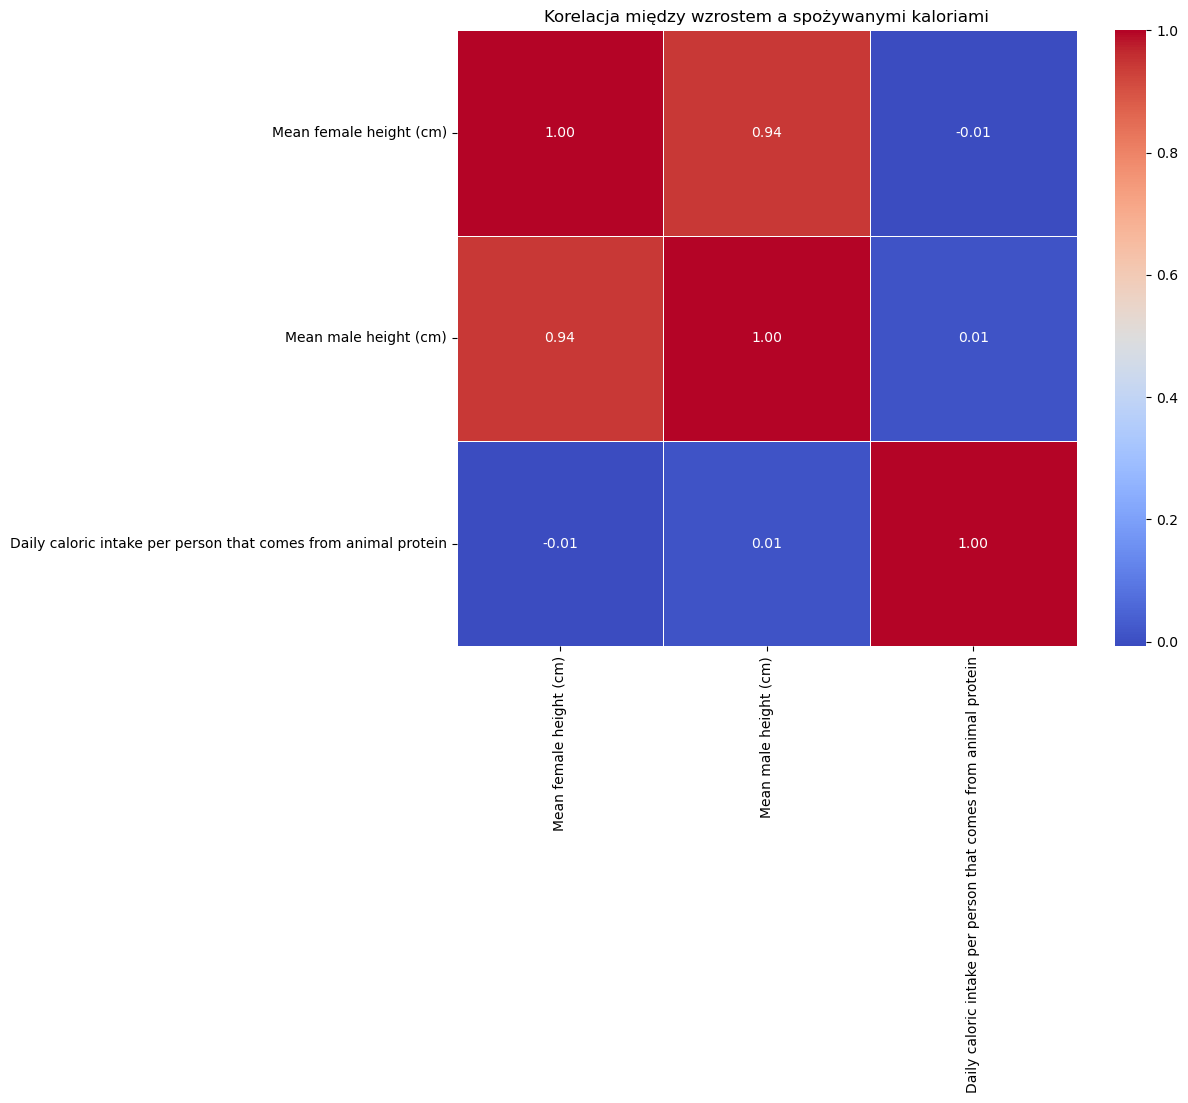

In [42]:
#Korelacja między danymi

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3_kalorie = 'Daily caloric intake per person that comes from animal protein'

correlation_matrix = data[[kolumna2_kobiety, kolumna2_mezczyzni, kolumna3_kalorie]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelacja między wzrostem a spożywanymi kaloriami')
plt.show()


In [43]:
#korelacja między danymi - dane zależne i niezależne
import pandas as pd

kolumna_year = 'Year'
kolumna2_kobiety = 'Mean female height (cm)'
kolumna2_mezczyzni = 'Mean male height (cm)'
kolumna3_kalorie = 'Daily caloric intake per person that comes from animal protein'

correlation_matrix = data[[kolumna_year, kolumna2_kobiety, kolumna2_mezczyzni, kolumna3_kalorie]].corr()

print("Macierz korelacji:")
correlation_matrix



Macierz korelacji:


,Year,Mean female height (cm),Mean male height (cm),Daily caloric intake per person that comes from animal protein
Year,1.000000,0.535367,0.550857,0.011722
Mean female height (cm),0.535367,1.000000,0.942616,-0.007774
Mean male height (cm),0.550857,0.942616,1.000000,0.010807
Daily caloric intake per person that comes from animal protein,0.011722,-0.007774,0.010807,1.000000


In [44]:
p_value_threshold = 0.05
correlation_matrix.applymap(lambda x: abs(x) < p_value_threshold)

,Year,Mean female height (cm),Mean male height (cm),Daily caloric intake per person that comes from animal protein
Year,False,False,False,True
Mean female height (cm),False,False,False,True
Mean male height (cm),False,False,False,True
Daily caloric intake per person that comes from animal protein,True,True,True,False


In [45]:
# H1: Nie ma różnicy między wzrostem kobiet i mężczyzn.
#Test: Test t-Studenta dla niezależnych prób.
from scipy import stats

statistic, p_value = stats.ttest_ind(data['Mean female height (cm)'], data['Mean male height (cm)'])

print(f"Statystyka testowa: {statistic}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H1. Istnieje statystycznie istotna różnica między wzrostem kobiet a mężczyzn.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H1.")


Statystyka testowa: -147.93676940590476
p-wartość: 0.0
Odrzucamy hipotezę H1. Istnieje statystycznie istotna różnica między wzrostem kobiet a mężczyzn.


In [46]:
# H2: Im więcej kalorii spożywają kobiety i mężczyźni, tym są wyżsi.
#Test: Korelacja Pearsona między ilością spożywanych kalorii a wzrostem.

kolumna_kalorie = 'Daily caloric intake per person that comes from animal protein'

correlation, p_value = stats.pearsonr(data[kolumna_kalorie], data['Mean female height (cm)'])
print(f"Korelacja kobiet: {correlation}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H2.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H2.")

correlation, p_value = stats.pearsonr(data[kolumna_kalorie], data['Mean male height (cm)'])
print(f"Korelacja mężczyzn: {correlation}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H2.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H2.")



Korelacja kobiet: -0.007774021585296753
p-wartość: 0.47095686691885186
Nie ma podstaw do odrzucenia hipotezy H2.
Korelacja mężczyzn: 0.010807114707105074
p-wartość: 0.3162418319011729
Nie ma podstaw do odrzucenia hipotezy H2.


In [47]:
# H3: Ilość spożywanych kalorii nie ma korelacji ze wzrostem.
#Test: Korelacja Pearsona między ilością spożywanych kalorii a wzrostem.

correlation, p_value = stats.pearsonr(data[kolumna_kalorie], data['Mean male height (cm)'])
print(f"Korelacja: {correlation}")
print(f"p-wartość: {p_value}")

if abs(correlation) < 0.1 or p_value > 0.05:
    print("Nie ma podstaw do odrzucenia hipotezy H3. Nie ma statystycznie istotnej korelacji.")
else:
    print("Odrzucamy hipotezę H3. Istnieje statystycznie istotna korelacja między ilością spożywanych kalorii a wzrostem.")


Korelacja: 0.010807114707105074
p-wartość: 0.3162418319011729
Nie ma podstaw do odrzucenia hipotezy H3. Nie ma statystycznie istotnej korelacji.


In [48]:
#H4: Wzrost kobiet i mężczyzn nie różni się między krajami.
#Test: Analiza wariancji (ANOVA).

from scipy.stats import f_oneway

grupy_kraje = [data[data['Entity'] == kraj]['Mean female height (cm)'] for kraj in data['Entity'].unique()]

statistic, p_value = f_oneway(*grupy_kraje)

print(f"Statystyka testowa: {statistic}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H4. Istnieje statystycznie istotna różnica w średnim wzroście między krajami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H4.")


Statystyka testowa: 166.69828870530807
p-wartość: 0.0
Odrzucamy hipotezę H4. Istnieje statystycznie istotna różnica w średnim wzroście między krajami.


In [49]:
#H5: Wzrost kobiet i mężczyzn nie zmienia się w zależności od dekady.
#Test: Analiza wariancji (ANOVA) z uwzględnieniem dekady.

data['Dekada'] = (data['Year'] // 10) * 10

grupy_dekady = [data[data['Dekada'] == dekada]['Mean female height (cm)'] for dekada in data['Dekada'].unique()]

statistic, p_value = f_oneway(*grupy_dekady)

print(f"Statystyka testowa: {statistic}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H5. Istnieje statystycznie istotna różnica w średnim wzroście między dekadami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H5.")


Statystyka testowa: 382.76072818100994
p-wartość: 0.0
Odrzucamy hipotezę H5. Istnieje statystycznie istotna różnica w średnim wzroście między dekadami.


In [50]:
#H6: Wzrost kobiet i mężczyzn nie jest statystycznie istotnie skorelowany.
#Test: Korelacja Pearsona.

correlation, p_value = stats.pearsonr(data['Mean female height (cm)'], data['Mean male height (cm)'])

print(f"Korelacja: {correlation}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H6. Istnieje statystycznie istotna korelacja między wzrostem kobiet a mężczyzn.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H6.")


Korelacja: 0.942616163187695
p-wartość: 0.0
Odrzucamy hipotezę H6. Istnieje statystycznie istotna korelacja między wzrostem kobiet a mężczyzn.


In [51]:
#H7: Wzrost nie jest różny między poszczególnymi krajami.
#Test: Test Kruskala-Wallisa (alternatywa dla ANOVA dla danych nie spełniających założeń normalności).

from scipy.stats import kruskal

statistic, p_value = kruskal(*grupy_kraje)

print(f"Statystyka testowa: {statistic}")
print(f"p-wartość: {p_value}")

if p_value < 0.05:
    print("Odrzucamy hipotezę H7. Istnieje statystycznie istotna różnica w średnim wzroście między krajami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy H7.")


Statystyka testowa: 6754.927628497666
p-wartość: 0.0
Odrzucamy hipotezę H7. Istnieje statystycznie istotna różnica w średnim wzroście między krajami.
